In [5]:
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
df = pd.read_csv('AirPassengers.csv')
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


<AxesSubplot:>

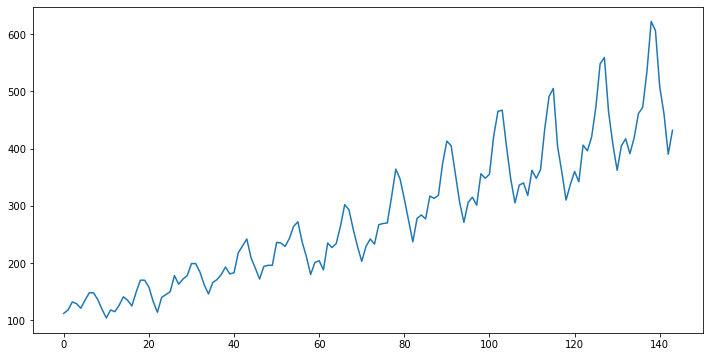

In [10]:
df['#Passengers'].plot()

In [12]:
df['#Passengers_diff'] = df['#Passengers'] - df['#Passengers'].shift(1)

In [13]:
df

,Month,#Passengers,#Passengers_diff
0,1949-01,112,NaN
1,1949-02,118,6.0
2,1949-03,132,14.0
3,1949-04,129,-3.0
4,1949-05,121,-8.0
...,...,...,...
139,1960-08,606,-16.0
140,1960-09,508,-98.0
141,1960-10,461,-47.0
142,1960-11,390,-71.0


<AxesSubplot:>

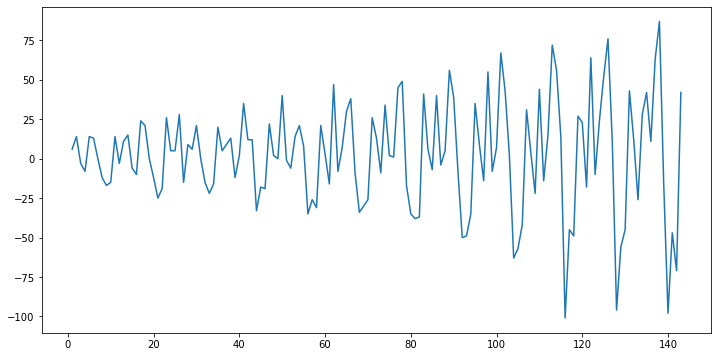

In [18]:
df['#Passengers_diff'].dropna().plot()

In [19]:
from statsmodels.tsa.stattools import adfuller

In [24]:
adfuller(df['#Passengers_diff'].dropna())

(-2.8292668241700007,
 0.05421329028382537,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854085)

In [20]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis.indicating it is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

In [23]:
adf_test(df['#Passengers_diff'].dropna())

ADF Statistics: -2.8292668241700007
p- value: 0.05421329028382537
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [26]:
df['#Passengers_sec_diff'] = df['#Passengers_diff'] - df['#Passengers_diff'].shift(1)
df

,Month,#Passengers,#Passengers_diff,#Passengers_sec_diff
0,1949-01,112,NaN,NaN
1,1949-02,118,6.0,NaN
2,1949-03,132,14.0,8.0
3,1949-04,129,-3.0,-17.0
4,1949-05,121,-8.0,-5.0
...,...,...,...,...
139,1960-08,606,-16.0,-103.0
140,1960-09,508,-98.0,-82.0
141,1960-10,461,-47.0,51.0
142,1960-11,390,-71.0,-24.0


<AxesSubplot:>

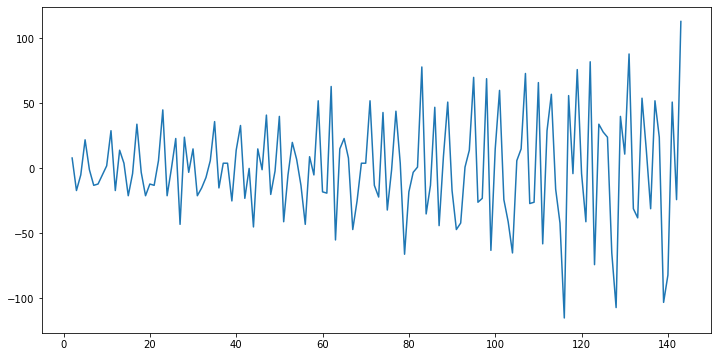

In [28]:
df['#Passengers_sec_diff'].dropna().plot()

In [27]:
adf_test(df['#Passengers_sec_diff'].dropna())

ADF Statistics: -16.384231542468516
p- value: 2.7328918500141235e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [30]:
from statsmodels.tsa.ar_model import AutoReg

In [39]:
model = AutoReg(df['#Passengers_sec_diff'].dropna(),lags=1).fit()

/Users/mujtabashaikh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [70]:
pred = model.predict(start=len(train),end=len(df)-1)

/Users/mujtabashaikh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [44]:
df.tail()

,Month,#Passengers,#Passengers_diff,#Passengers_sec_diff
139,1960-08,606,-16.0,-103.0
140,1960-09,508,-98.0,-82.0
141,1960-10,461,-47.0,51.0
142,1960-11,390,-71.0,-24.0
143,1960-12,432,42.0,113.0


In [61]:
dff = df['#Passengers_sec_diff'].dropna()
dff

2        8.0
3      -17.0
4       -5.0
5       22.0
6       -1.0
       ...  
139   -103.0
140    -82.0
141     51.0
142    -24.0
143    113.0
Name: #Passengers_sec_diff, Length: 142, dtype: float64

In [62]:
train = dff[:len(df)-7]

In [63]:
train.shape

(137,)

In [52]:
df.shape

(144, 4)

In [66]:
test = dff[len(dff)-7:]

In [67]:
test.shape

(7,)

In [68]:
test

137     52.0
138     24.0
139   -103.0
140    -82.0
141     51.0
142    -24.0
143    113.0
Name: #Passengers_sec_diff, dtype: float64

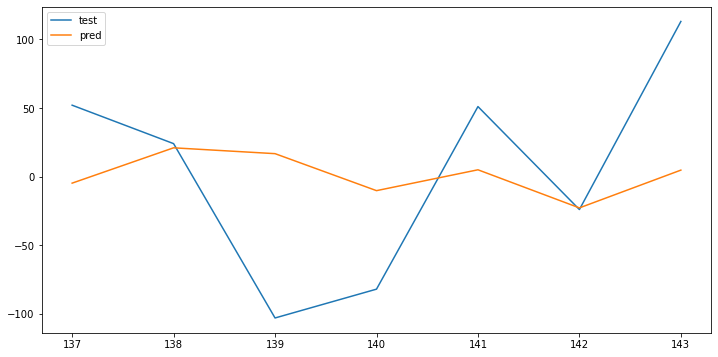

In [76]:
plt.plot(test,label='test')
plt.plot(pred,label= 'pred')
plt.legend()

In [79]:
from sklearn.metrics import mean_absolute_error

In [82]:
import numpy as np
rmse = np.sqrt(mean_absolute_error(test,pred))
print("RMSE Of Prediction is : ",rmse)

RMSE Of Prediction is :  7.623340515371777


In [83]:
predict_future = model.predict(start=len(dff)+1,end=len(dff)+7)

/Users/mujtabashaikh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [84]:
predict_future

143    4.709067
144   -0.866191
145    0.263437
146    0.034558
147    0.080932
148    0.071536
149    0.073440
dtype: float64

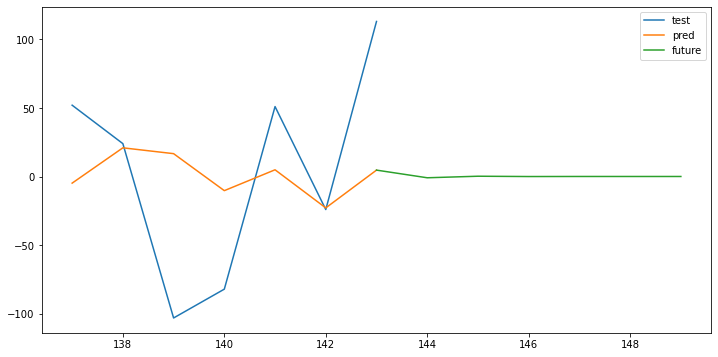

In [86]:
plt.plot(test,label='test')
plt.plot(pred,label= 'pred')
plt.plot(predict_future,label='future')
plt.legend()